## Case Study: Are Bookings Off?

This data set is a simplified version of what all the companies with online presence deal with. 
#### Business Understanding
It is important for us to know when something goes wrong or our key business metrics are moving outside of our expectations. 
To this end, we set up alerts that are triggered when a metric moves outside of our expectations. These alerts allow us to be proactive in fixing problems rather than waiting for catastrophes.
#### Objective
The product team has asked you to follow the number of bookings per day in two key markets and alert them when the daily fluctuation is too high. For this alert, they’ve asked you to create a 30-­day rolling average and alert them when the daily value is above or below two standard deviations of the rolling mean.
The data in csv format for you to test out your alert. When you apply this alert over the past year for these two markets, how many alerts would have been triggered by this rule for each market?

#### Data Dictionary
●	City: City details
●	Ds: date
●	Bookings: Bookings made in the day

#### Data Source
https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv


In [1]:
import pandas as pd
print(pd.__version__)

pd.set_option('mode.chained_assignment', None) #Support warning with copying of dataframes
# This code will not complain!
# pd.reset_option("mode.chained_assignment")

import os
os.getcwd()

1.4.4


'/Users/davidwood/Downloads/imp_ba/Case Studies'

In [2]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv'
df = pd.read_csv(url, parse_dates=['ds'])

In [3]:
df

,city,ds,bookings
0,City_2,2013-01-01,69
1,City_2,2013-01-02,101
2,City_2,2013-01-03,134
3,City_2,2013-01-04,155
4,City_2,2013-01-05,104
...,...,...,...
724,City_1,2013-12-27,55
725,City_1,2013-12-28,63
726,City_1,2013-12-29,55
727,City_1,2013-12-30,66


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      729 non-null    object        
 1   ds        729 non-null    datetime64[ns]
 2   bookings  729 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.2+ KB


In [5]:
df.dtypes

city                object
ds          datetime64[ns]
bookings             int64
dtype: object

In [6]:
df.shape

(729, 3)

In [7]:
df.describe()

,bookings
count,729.000000
mean,139.685871
std,108.373686
min,13.000000
25%,39.000000
50%,96.000000
75%,230.000000
max,397.000000


#### Define variables for City_1 and City_2

In [8]:
city1 = df.loc[df['city'] =='City_1']
city1.head()

,city,ds,bookings
364,City_1,2013-01-01,16
365,City_1,2013-01-02,20
366,City_1,2013-01-03,15
367,City_1,2013-01-04,22
368,City_1,2013-01-05,16


In [9]:
city2 = df.loc[df['city'] =='City_2']
city2.head()

,city,ds,bookings
0,City_2,2013-01-01,69
1,City_2,2013-01-02,101
2,City_2,2013-01-03,134
3,City_2,2013-01-04,155
4,City_2,2013-01-05,104


#### Set the rolling average and assign a new column

In [10]:
city1['MA'] = city1.loc[:,'bookings'].rolling(30).mean()
city2['MA'] = city2.loc[:,'bookings'].rolling(30).mean()

In [11]:
city1

,city,ds,bookings,MA
364,City_1,2013-01-01,16,NaN
365,City_1,2013-01-02,20,NaN
366,City_1,2013-01-03,15,NaN
367,City_1,2013-01-04,22,NaN
368,City_1,2013-01-05,16,NaN
...,...,...,...,...
724,City_1,2013-12-27,55,63.100000
725,City_1,2013-12-28,63,63.166667
726,City_1,2013-12-29,55,62.733333
727,City_1,2013-12-30,66,63.533333


In [12]:
city2

,city,ds,bookings,MA
0,City_2,2013-01-01,69,NaN
1,City_2,2013-01-02,101,NaN
2,City_2,2013-01-03,134,NaN
3,City_2,2013-01-04,155,NaN
4,City_2,2013-01-05,104,NaN
...,...,...,...,...
359,City_2,2013-12-27,232,197.500000
360,City_2,2013-12-28,182,198.500000
361,City_2,2013-12-29,199,199.966667
362,City_2,2013-12-30,209,201.900000


In [13]:
city1.dropna(inplace=True)
city2.dropna(inplace=True)

In [14]:
city1.describe()

,bookings,MA
count,336.000000,336.000000
mean,45.431548,43.830556
std,18.120363,16.060213
min,13.000000,21.766667
25%,31.000000,28.900000
50%,42.000000,41.416667
75%,59.000000,57.983333
max,97.000000,71.233333


In [15]:
city2.describe()

,bookings,MA
count,335.000000,335.000000
mean,244.770149,242.500995
std,63.108103,49.906647
min,115.000000,136.166667
25%,195.500000,208.050000
50%,238.000000,235.066667
75%,286.000000,289.083333
max,397.000000,325.600000


#### Set the rolling sd and add as a new column

In [16]:
city1['Msd'] = city1['bookings'].rolling(30).std()
city2['Msd'] = city2['bookings'].rolling(30).std()

In [17]:
city1

,city,ds,bookings,MA,Msd
393,City_1,2013-01-30,26,21.766667,NaN
394,City_1,2013-01-31,20,21.900000,NaN
395,City_1,2013-02-01,24,22.033333,NaN
396,City_1,2013-02-02,17,22.100000,NaN
397,City_1,2013-02-03,23,22.133333,NaN
...,...,...,...,...,...
724,City_1,2013-12-27,55,63.100000,12.949105
725,City_1,2013-12-28,63,63.166667,12.943067
726,City_1,2013-12-29,55,62.733333,12.993190
727,City_1,2013-12-30,66,63.533333,12.397812


In [18]:
city2

,city,ds,bookings,MA,Msd
29,City_2,2013-01-30,144,136.166667,NaN
30,City_2,2013-01-31,160,139.200000,NaN
31,City_2,2013-02-01,159,141.133333,NaN
32,City_2,2013-02-02,115,140.500000,NaN
33,City_2,2013-02-03,129,139.633333,NaN
...,...,...,...,...,...
359,City_2,2013-12-27,232,197.500000,36.328720
360,City_2,2013-12-28,182,198.500000,35.434982
361,City_2,2013-12-29,199,199.966667,34.469860
362,City_2,2013-12-30,209,201.900000,33.233085


In [19]:
city1.dropna(inplace=True)
city2.dropna(inplace=True)

#### Calculating 2 sd's above and below the rolling average

In [20]:
city1['2_sd_abv'] = city1['MA'] + (2*city1['Msd'])
city1['2_sd_blw'] = city1['MA'] - (2*city1['Msd'])
city1

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw
422,City_1,2013-02-28,34,27.100000,6.944857,40.989713,13.210287
423,City_1,2013-03-01,28,27.166667,6.943533,41.053732,13.279602
424,City_1,2013-03-02,22,27.233333,6.881676,40.996686,13.469980
425,City_1,2013-03-03,31,27.466667,6.886936,41.240538,13.692795
426,City_1,2013-03-04,39,28.200000,6.905270,42.010541,14.389459
...,...,...,...,...,...,...,...
724,City_1,2013-12-27,55,63.100000,12.949105,88.998209,37.201791
725,City_1,2013-12-28,63,63.166667,12.943067,89.052801,37.280532
726,City_1,2013-12-29,55,62.733333,12.993190,88.719713,36.746953
727,City_1,2013-12-30,66,63.533333,12.397812,88.328958,38.737709


In [21]:
city2['2_sd_abv'] = city2['MA'] + (2*city2['Msd'])
city2['2_sd_blw'] = city2['MA'] - (2*city2['Msd'])
city2

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw
58,City_2,2013-02-28,190,170.566667,29.928286,230.423239,110.710095
59,City_2,2013-03-01,181,171.800000,29.555792,230.911584,112.688416
60,City_2,2013-03-02,168,172.066667,29.481652,231.029971,113.103362
61,City_2,2013-03-03,190,173.100000,29.551066,232.202133,113.997867
62,City_2,2013-03-04,212,176.333333,28.252962,232.839258,119.827409
...,...,...,...,...,...,...,...
359,City_2,2013-12-27,232,197.500000,36.328720,270.157439,124.842561
360,City_2,2013-12-28,182,198.500000,35.434982,269.369963,127.630037
361,City_2,2013-12-29,199,199.966667,34.469860,268.906387,131.026946
362,City_2,2013-12-30,209,201.900000,33.233085,268.366170,135.433830


#### Creating an alert

In [22]:
city1['alert_blw'] = city1['bookings'] < city1['2_sd_blw']
city1['alert_abv'] = city1['bookings'] > city1['2_sd_abv']

city1

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
422,City_1,2013-02-28,34,27.100000,6.944857,40.989713,13.210287,False,False
423,City_1,2013-03-01,28,27.166667,6.943533,41.053732,13.279602,False,False
424,City_1,2013-03-02,22,27.233333,6.881676,40.996686,13.469980,False,False
425,City_1,2013-03-03,31,27.466667,6.886936,41.240538,13.692795,False,False
426,City_1,2013-03-04,39,28.200000,6.905270,42.010541,14.389459,False,False
...,...,...,...,...,...,...,...,...,...
724,City_1,2013-12-27,55,63.100000,12.949105,88.998209,37.201791,False,False
725,City_1,2013-12-28,63,63.166667,12.943067,89.052801,37.280532,False,False
726,City_1,2013-12-29,55,62.733333,12.993190,88.719713,36.746953,False,False
727,City_1,2013-12-30,66,63.533333,12.397812,88.328958,38.737709,False,False


In [23]:
city2['alert_blw'] = city2['bookings'] < city2['2_sd_blw']
city2['alert_abv'] = city2['bookings'] > city2['2_sd_abv']

city2

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
58,City_2,2013-02-28,190,170.566667,29.928286,230.423239,110.710095,False,False
59,City_2,2013-03-01,181,171.800000,29.555792,230.911584,112.688416,False,False
60,City_2,2013-03-02,168,172.066667,29.481652,231.029971,113.103362,False,False
61,City_2,2013-03-03,190,173.100000,29.551066,232.202133,113.997867,False,False
62,City_2,2013-03-04,212,176.333333,28.252962,232.839258,119.827409,False,False
...,...,...,...,...,...,...,...,...,...
359,City_2,2013-12-27,232,197.500000,36.328720,270.157439,124.842561,False,False
360,City_2,2013-12-28,182,198.500000,35.434982,269.369963,127.630037,False,False
361,City_2,2013-12-29,199,199.966667,34.469860,268.906387,131.026946,False,False
362,City_2,2013-12-30,209,201.900000,33.233085,268.366170,135.433830,False,False


<AxesSubplot:>

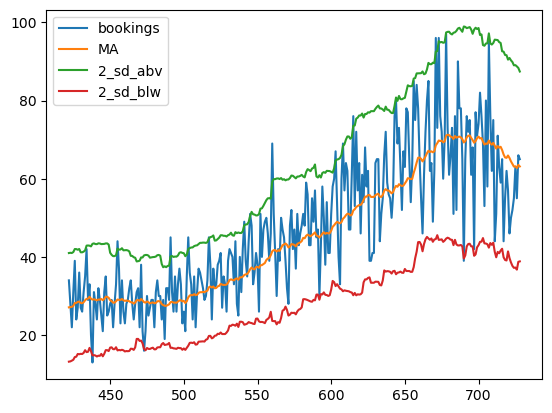

In [24]:
city1[['bookings', 'MA', '2_sd_abv', '2_sd_blw']].plot(use_index=True)

<AxesSubplot:>

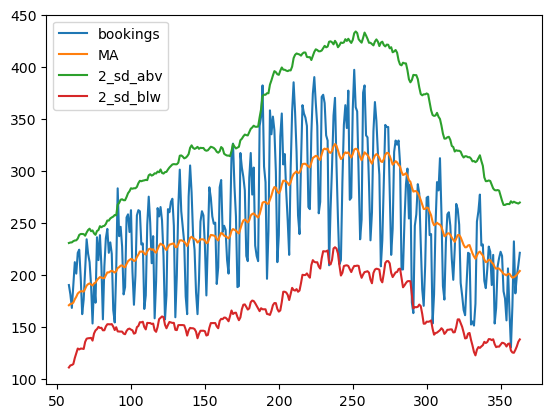

In [25]:
city2[['bookings', 'MA', '2_sd_abv', '2_sd_blw']].plot(use_index=True)

In [33]:
city1[city1['alert_blw'] == True]

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
438,City_1,2013-03-16,13,29.066667,7.138692,43.344050,14.789283,True,False
473,City_1,2013-04-20,16,28.433333,5.975140,40.383613,16.483053,True,False
690,City_1,2013-11-23,39,69.266667,14.832242,98.931151,39.602183,True,False


In [36]:
city1[city1['alert_abv'] == True]

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
455,City_1,2013-04-02,44,29.100000,6.509145,42.118290,16.081710,False,True
491,City_1,2013-05-08,45,28.433333,5.846799,40.126931,16.739736,False,True
503,City_1,2013-05-20,45,29.633333,6.178290,41.989913,17.276754,False,True
517,City_1,2013-06-03,45,32.233333,6.223888,44.681109,19.785557,False,True
541,City_1,2013-06-27,49,35.366667,6.354381,48.075429,22.657904,False,True
545,City_1,2013-07-01,51,36.833333,6.838448,50.510229,23.156438,False,True
560,City_1,2013-07-16,69,41.433333,8.908281,59.249895,23.616771,False,True
603,City_1,2013-08-28,67,48.600000,8.032692,64.665384,32.534616,False,True
608,City_1,2013-09-02,69,49.766667,9.276159,68.318985,31.214349,False,True
615,City_1,2013-09-09,76,51.866667,10.836507,73.539681,30.193653,False,True


In [30]:
city2[city2['alert_blw'] == True]

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
234,City_2,2013-08-24,209,317.700000,53.134929,423.969858,211.430142,True,False
290,City_2,2013-10-19,173,284.000000,51.602593,387.205186,180.794814,True,False
291,City_2,2013-10-20,163,279.866667,56.122239,392.111145,167.622188,True,False


In [31]:
city2[city2['alert_abv'] == True]

,city,ds,bookings,MA,Msd,2_sd_abv,2_sd_blw,alert_blw,alert_abv
91,City_2,2013-04-02,283,206.333333,30.447618,267.228570,145.438096,False,True
169,City_2,2013-06-19,326,243.833333,40.858109,325.549551,162.117116,False,True
189,City_2,2013-07-10,382,269.233333,51.275243,371.783820,166.682847,False,True
